In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tqdm import tqdm
import PIL
import PIL.Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

c:\Users\jonat\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(tf.__version__)

2.12.0


# **SETUP**

In [3]:
# module_selection = ("mobilenet_v2", 224, 1280) #@param ["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}
# handle_base, pixels, FV_SIZE = module_selection
# MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
# IMAGE_SIZE = (pixels, pixels)
# print("Using {} with input size {} and output dimension {}".format(MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

In [4]:
# Load data
import pathlib
lokasi = r"C:\Users\jonat\Downloads\Bangkit 2023 Capstone\WasteDataset"
data_dir = pathlib.Path(lokasi).with_suffix('')

# **Load Image**

**Contoh visualisasi data**

In [5]:
# plt.figure(figsize=(10,10))
# for gambar, kelas in train_data.take(1):
#     for i in range(6):
#         ax = plt.subplot(3, 3, i+1)
#         plt.imshow(gambar[i].numpy().astype("uint8"))
#         plt.title(nama_kelas[kelas[i]])
#         plt.axis("off")

# **Data Preprocesing**

**Parameter**

In [6]:
# batch_size = 32
img_height = 256
img_width = 256

**Splitting data train dan test**

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

11405


**Format Data**

In [8]:
# train_data = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   # image_size=(img_height, img_width),
#   # batch_size=batch_size,
#   shuffle=True)

In [9]:
# val_data = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   # image_size=(img_height, img_width),
#   # batch_size=batch_size,
#   shuffle=True)

In [10]:
# nama_kelas = train_data.class_names
# banyak_kelas = len(nama_kelas)
# print(banyak_kelas)
# print(nama_kelas)

**Augmentasi**

In [11]:
def aug(data,validasi):
    train_datagen = ImageDataGenerator(rescale=1.0/255.
                                        # rotation_range=40,
                                        # width_shift_range=0.2,
                                        # height_shift_range=0.2,
                                        # shear_range=0.2,
                                        # zoom_range=0.2,
                                        # horizontal_flip=True,
                                        # fill_mode='nearest'
                                        )

    # Pass in the appropriate arguments to the flow_from_directory method
    train_generator = train_datagen.flow_from_directory(directory=data,
                                                        batch_size=32,
                                                        class_mode='sparse',
                                                        target_size=(img_height, img_width))

    # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
    validation_datagen = ImageDataGenerator(rescale = 1./255)

    # Pass in the appropriate arguments to the flow_from_directory method
    validation_generator = validation_datagen.flow_from_directory(directory=validasi,
                                                                batch_size=32,
                                                                class_mode='sparse',
                                                                target_size=(img_height, img_width))
    ### END CODE HERE
    return train_generator, validation_generator

In [12]:
train_generator, validation_generator = aug(r'C:\Users\jonat\Downloads\Bangkit 2023 Capstone\classification_data_3\train', r'C:\Users\jonat\Downloads\Bangkit 2023 Capstone\classification_data_3\val')

Found 9121 images belonging to 6 classes.
Found 2284 images belonging to 6 classes.


**Info Batch**

In [13]:
# banyaknya batch dan ukuran data
for batch_gambar, batch_kelas in validation_generator:
    print(batch_gambar.shape)
    print(batch_kelas.shape)
    break

(32, 256, 256, 3)
(32,)


# **Buat Model**

**Optimizer**

In [59]:
def create_model():

  model = tf.keras.models.Sequential([
    # Layer Normalisasi
    # tf.keras.layers.Rescaling(1/255.),
    # Convo Pertama
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Dropout(0.5),
    
    # Convo Kedua
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.2),

    # Convo layer ketiga
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    # extractor,
    tf.keras.layers.Dense(6, activation='softmax')
])

  model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

  return model 

In [60]:
# Save model
model = create_model()

# Train model
history = model.fit(train_generator,
                    epochs=15,
                    steps_per_epoch=100,
                    validation_data=validation_generator,
                    validation_steps=50)

Epoch 1/15
100/100 [==============================] - 89s 887ms/step - loss: 1.9057 - accuracy: 0.3657 - val_loss: 1.3775 - val_accuracy: 0.4387
Epoch 2/15
100/100 [==============================] - 87s 872ms/step - loss: 1.2703 - accuracy: 0.4850 - val_loss: 1.1259 - val_accuracy: 0.5444
Epoch 3/15
100/100 [==============================] - 87s 871ms/step - loss: 1.1029 - accuracy: 0.5689 - val_loss: 0.9911 - val_accuracy: 0.6031
Epoch 4/15
100/100 [==============================] - 87s 869ms/step - loss: 1.0089 - accuracy: 0.6050 - val_loss: 1.0293 - val_accuracy: 0.6012
Epoch 5/15
100/100 [==============================] - 89s 889ms/step - loss: 0.8831 - accuracy: 0.6572 - val_loss: 0.8976 - val_accuracy: 0.6569
Epoch 6/15
100/100 [==============================] - 88s 880ms/step - loss: 0.7876 - accuracy: 0.7075 - val_loss: 0.8775 - val_accuracy: 0.6644
Epoch 7/15
100/100 [==============================] - 106s 1s/step - loss: 0.6748 - accuracy: 0.7534 - val_loss: 0.8263 - val_accu

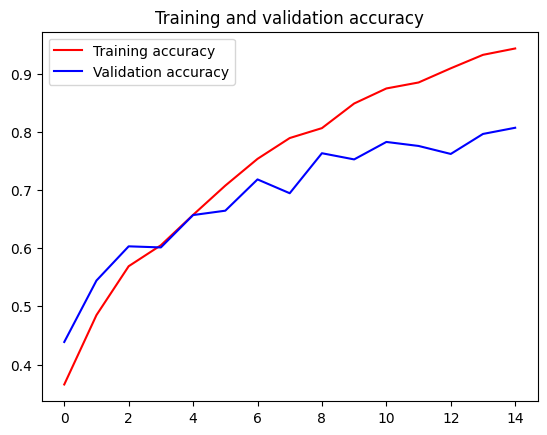

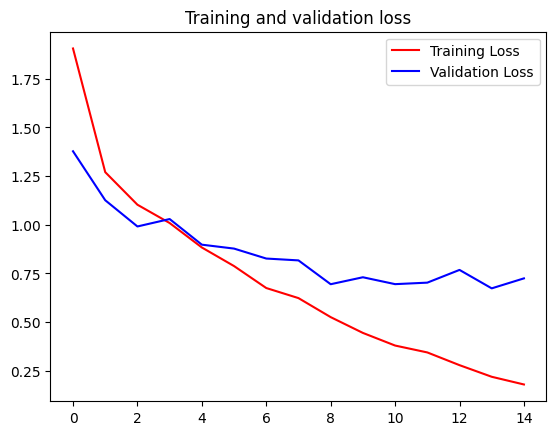

In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# **Save Model**

**TF Lite**

In [62]:
export_dir = 'carupah_recognition_model/model_1'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: carupah_recognition_model/model_1\assets


INFO:tensorflow:Assets written to: carupah_recognition_model/model_1\assets


In [64]:
mode = "Speed"

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [65]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

In [66]:
tflite_model_file = pathlib.Path('carupah_recognition_model/carupah_model.tflite')
tflite_model_file.write_bytes(tflite_model)

29527128

**JS**

In [67]:
import time

saved_model_path = "carupah_recognition_model/carupah_model.h5".format(int(time.time()))

model.save(saved_model_path)

**JS Converter**

In [70]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ./

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\jonat\AppData\Local\Programs\Python\Python311\Scripts\tensorflowjs_converter.exe\__main__.py", line 4, in <module>
  File "C:\Users\jonat\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflowjs\__init__.py", line 21, in <module>
    from tensorflowjs import converters
  File "C:\Users\jonat\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflowjs\converters\__init__.py", line 21, in <module>
    from tensorflowjs.converters.converter import convert
  File "C:\Users\jonat\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflowjs\converters\converter.py", line 37, in <module>
    from tensorflowjs.converters import tf_saved_model_conversion_v2
  File "C:\Users\jonat\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflowjs\converters\tf_saved_model_conversion_v2.py", line 42, in 